In [28]:
# data processing
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
# linear algebra
import numpy as np 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [29]:
#IMPORTATION DES DONNEES titanic_train pour le training de l'(algo)
titanic_train = pd.read_csv(r"/Users/ano/Desktop/projet_2/titanic/train.csv",encoding = "latin1")
#IMPORTATION DES DONNEES titanic_test 
titanic_test = pd.read_csv(r"/Users/ano/Desktop/projet_2/titanic/test.csv",encoding = "latin1")
print(titanic_test)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [30]:
#description de la data set
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
#nombre de ligne et de colonne
titanic_train.shape

(891, 12)

In [33]:
#recupération de maximun de détaille( examiner les valeure manquande)
total = titanic_train.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_train.isnull().sum()/titanic_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [34]:
titanic_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

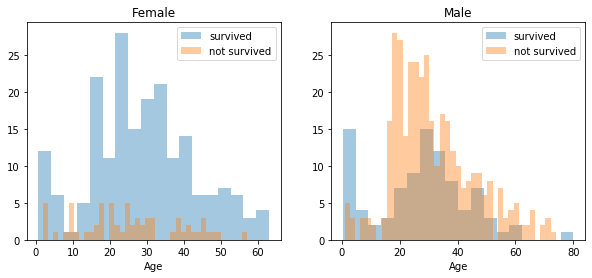

In [35]:
#il serait logique que tout sauf «PassengerId», «Ticket» et «Name» soit en corrélation avec un taux de survie élevé.
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic_train[titanic_train['Sex']=='female']
men = titanic_train[titanic_train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


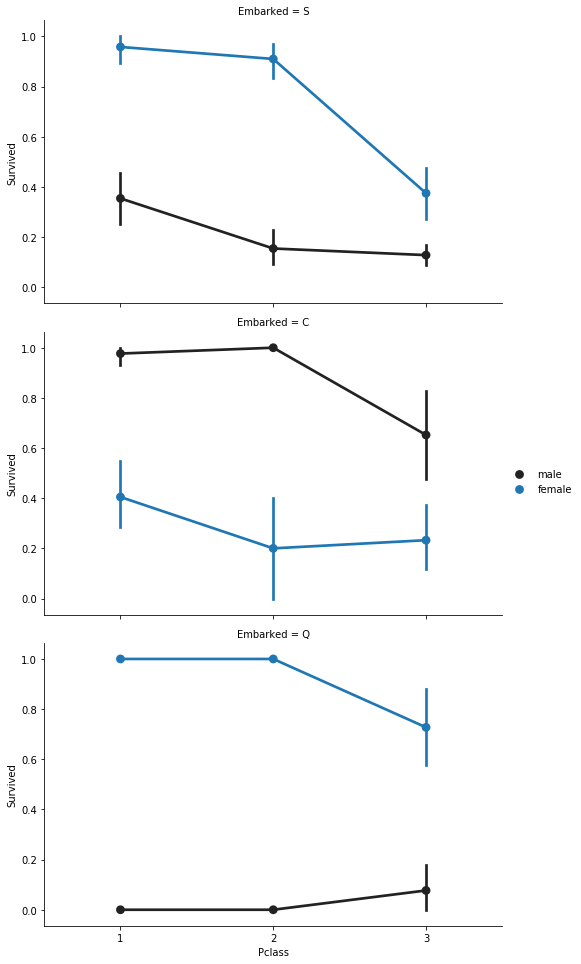

In [36]:
#Embarked, Pclass et Sex
FacetGrid = sns.FacetGrid(titanic_train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [37]:
#Embarqué semble être en corrélation avec la survie, selon le sexe.
#Les femmes au port Q et au port S ont plus de chances de survivre. 
#L'inverse est vrai, s'ils sont au port C. Les hommes ont une forte probabilité de survie s'ils sont au port C, 
#mais une faible probabilité s'ils sont au port Q ou S.

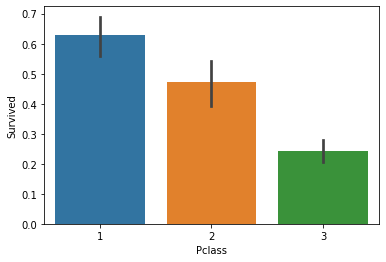

In [38]:
sns.barplot(x='Pclass', y='Survived', data=titanic_train)

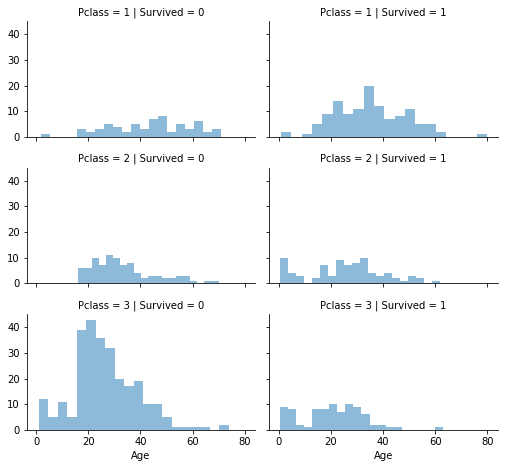

In [39]:
grid = sns.FacetGrid(titanic_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [40]:
# caluler le nombre de famille 
data = [titanic_train, titanic_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
titanic_train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/Users/ano/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


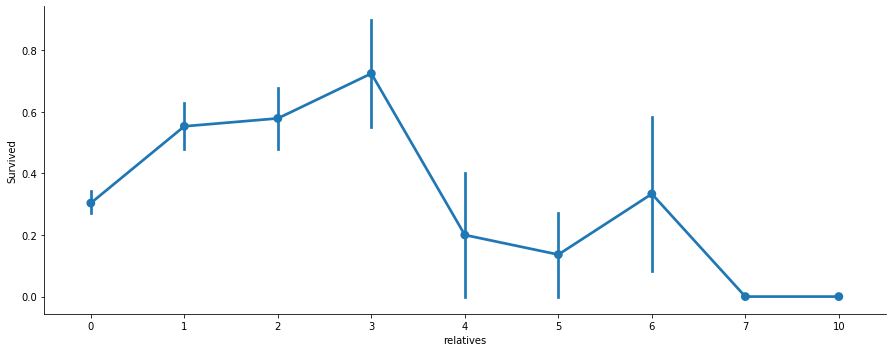

In [41]:
es = sns.factorplot('relatives','Survived', 
                      data=titanic_train, aspect = 2.5, )
#Ici, nous pouvons voir que vous aviez une forte probabilité de survie avec 1 à 3 parents,
# mais une probabilité plus faible si vous aviez moins de 1 ou plus de 3 
#(sauf dans certains cas avec 6 parents).

In [ ]:
# data Cleaner
titanic_train = titanic_train.drop(['PassengerId'], axis=1)
#celui-ci est unitile a notre data set

In [5]:
#Supprimer les valeurs nulles, s’il en existe.
titanic_train.isna().sum() #somme des na
titanic_train.dropna()
#cette ligne de code del a belle est bien fonctionné ce qui ma parmis de suprimer la colone Cabin qui avait plus de la moitier des ligne NAN
del titanic_train['Cabin']
del titanic_train['Name']
#j'ai tranformer les age qui étais notifier pour le peut en NAN par la mediane de celle-ci
age = titanic_train['Age'].median()
titanic_train['Age'].fillna(age, inplace=True)
#pareille pour la colonne embarked qui contenait tres peut de NAN qui j'ai remplacer par celle qui dépasser la moyenne en gros S
embarked = "S"
titanic_train['Embarked'].fillna(embarked, inplace=True)

In [6]:
#verification des mes données pour verifier la supression de colone
print(titanic_train.head(10))


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   
5            6         0       3    male  28.0      0      0   
6            7         0       1    male  54.0      0      0   
7            8         0       3    male   2.0      3      1   
8            9         1       3  female  27.0      0      2   
9           10         1       2  female  14.0      1      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S  
5            330877   8.4583        Q  
6             1

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


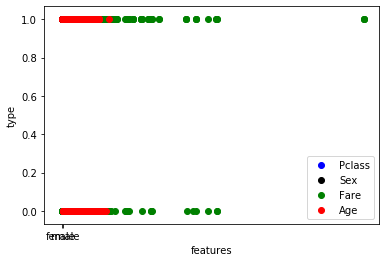

In [49]:
#je reverifie bien si mon dossier n' a plus de Nan et qui celle ci est belle et bien clean
print(titanic_train.isna().sum())


plt.xlabel('features')
plt.ylabel('type')
pltX=titanic_train.loc[:,'Survived']
pltY=titanic_train.loc[:,'Pclass']
plt.scatter(pltY,pltX, color ='blue', label='Pclass')

pltX=titanic_train.loc[:,'Survived']
pltY=titanic_train.loc[:,'Sex']
plt.scatter(pltY,pltX, color ='black', label='Sex')

pltX=titanic_train.loc[:,'Survived']
pltY=titanic_train.loc[:,'Fare']
plt.scatter(pltY,pltX, color ='green', label='Fare')

pltX=titanic_train.loc[:,'Survived']
pltY=titanic_train.loc[:,'Age']
plt.scatter(pltY,pltX, color ='red', label='Age')

plt.legend()
plt.show()
#ce type de graphique montre deja que les donné sont plus adapter au teste de regression logistique..;

In [8]:
# on refait les méme analyse pour le CSV test qu'il faut cleaner
#IMPORTATION DES DONNEES titanic_test 
titanic_test = pd.read_csv(r"/Users/ano/Desktop/projet_2/titanic/test.csv",encoding = "latin1")
print(titanic_test)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [9]:
print(titanic_test.head)
print(titanic_test.shape)
print(titanic_test.describe())

<bound method NDFrame.head of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0 

In [10]:
#Supprimer les valeurs nulles, s’il en existe.
titanic_test.isna().sum() #somme des na

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
titanic_train.dropna()
#cette ligne de code del a belle est bien fonctionné ce qui ma parmis de suprimer la colone Cabin qui avait plus de la moitier des ligne NAN
del titanic_test['Cabin']
del titanic_test['Name']
#j'ai tranformer les age qui étais notifier pour le peut en NAN par la mediane de celle-ci
age = titanic_test['Age'].median()
titanic_test['Age'].fillna(age, inplace=True)
#pareille pour la colonne embarked qui contenait tres peut de NAN qui j'ai remplacer par celle qui dépasser la moyenne en gros S
embarked = "S"
titanic_test['Embarked'].fillna(embarked, inplace=True)


In [12]:
#je reverifie bien si mon dossier n' a plus de Nan et qui celle ci est belle et bien clean
print(titanic_test.isna().sum())
#on observe qu'il reste toujour un NAN dans Fare je fais le choix de la remplacer par la moyenne des fare
fare = titanic_test['Fare'].mean()
titanic_test['Fare'].fillna(fare, inplace=True)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


In [13]:
#je re verifie la dataset
print(titanic_test.isna().sum())


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [99]:


#exporter le fichier training en CVS dans mon dossier pour analuse avec visuelle sur power BI
titanic_train.to_csv('/Users/ano/Desktop/projet_2/titanic/titanic_train.csv', sep = ',',index = True)

In [100]:
#exporter le fichier test en CVS dans mon dossier pour analuse avec visuelle sur power BI
titanic_test.to_csv('/Users/ano/Desktop/projet_2/titanic/titanic_test.csv', sep = ',', index = True)

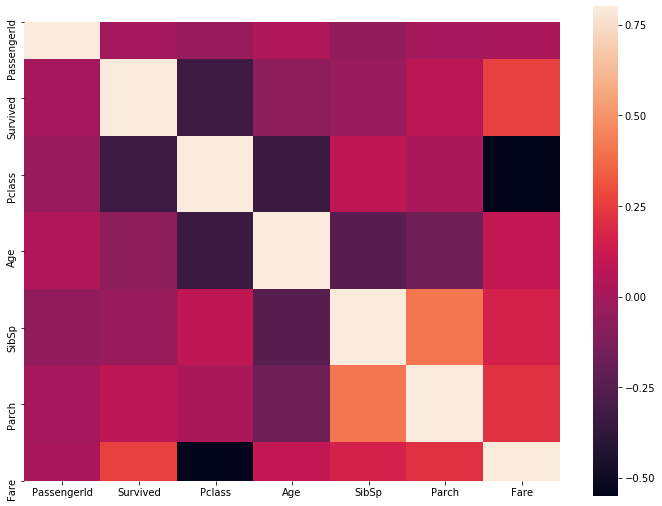

In [101]:
#observation des variable corréllé entre elles.
corrmat = titanic_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [102]:
#création de X_train tout le tableau sauf les survivant, et les ticket
x_train = titanic_train.drop('Survived', axis=1)
#del titanic_test['Ticket']
print(x_train.shape)
print(x_train.head())


(891, 9)
   PassengerId  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0            1       3    male  22.0      1      0         A/5 21171   7.2500   
1            2       1  female  38.0      1      0          PC 17599  71.2833   
2            3       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3            4       1  female  35.0      1      0            113803  53.1000   
4            5       3    male  35.0      0      0            373450   8.0500   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S  


In [110]:
#création de Y_train ne contenant que les  nombres de cas de survivant
y_train = titanic_train['Survived'].values.reshape(-1,1)
print(y_train.shape)
print(y_train)
#exporter le fichier training en CVS dans mon dossier pour analuse avec visuelle sur power BI



(891, 1)
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 

In [117]:
dummies = pd.get_dummies(titanic_train['Sex'], prefix='sex')
x_train = pd.concat([x_train,dummies], axis=1)
dummies_emb = pd.get_dummies(titanic_train['Embarked'], prefix='embarked')
x_train = pd.concat([x_train,dummies_emb], axis=1)
#del x_train['Sex']
#del x_train['Embarked']
#del x_train['Ticket']
#supression de plusieur variable pour effectuer les conde teste linear
del x_train['Sex']
del x_train['Embarked']
del x_train['Ticket']
del x_train['PassengerId']
del x_train['SibSp']
del x_train['Parch']
print(x_train)
#plt.hist(x_train, density = True)
#plt.shox()


KeyError: 'Sex'

In [105]:
#création de X_test tout le tableau sauf les survivant, et les ticket
x_test = titanic_test#.drop('Survived', axis=1)
print(x_test.shape)
print(x_test.head())
dummies1 = pd.get_dummies(titanic_test['Sex'], prefix='sex')
x_test = pd.concat([x_test,dummies1], axis=1)
dummies_emb1 = pd.get_dummies(titanic_test['Embarked'], prefix='embarked')
x_test = pd.concat([x_test,dummies_emb1], axis=1)


(418, 9)
   PassengerId  Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Embarked
0          892       3    male  34.5      0      0   330911   7.8292        Q
1          893       3  female  47.0      1      0   363272   7.0000        S
2          894       2    male  62.0      0      0   240276   9.6875        Q
3          895       3    male  27.0      0      0   315154   8.6625        S
4          896       3  female  22.0      1      1  3101298  12.2875        S


In [106]:
#supression de plusieur variable pour effectuer les seconde teste de regression linear
del x_test['Sex']
del x_test['Embarked']
del x_test['Ticket']
del x_test['PassengerId']
del x_test['SibSp']
del x_test['Parch']
print(x_test)

     Pclass   Age      Fare  sex_female  sex_male  embarked_C  embarked_Q  \
0         3  34.5    7.8292           0         1           0           1   
1         3  47.0    7.0000           1         0           0           0   
2         2  62.0    9.6875           0         1           0           1   
3         3  27.0    8.6625           0         1           0           0   
4         3  22.0   12.2875           1         0           0           0   
..      ...   ...       ...         ...       ...         ...         ...   
413       3  27.0    8.0500           0         1           0           0   
414       1  39.0  108.9000           1         0           1           0   
415       3  38.5    7.2500           0         1           0           0   
416       3  27.0    8.0500           0         1           0           0   
417       3  27.0   22.3583           0         1           1           0   

     embarked_S  
0             0  
1             1  
2             0  
3  

In [107]:
#création de y_train ne contenant que les survivant  cas 
y_test= y_train
print(y_test)

[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]


In [23]:
# Construction du modèle
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
import numpy as np
print(model.intercept_)
print(model.coef_)

#calcul du R²
print("R² :", model.score(x_train,y_train))

RMSE=np.sqrt(((y_train-model.predict(x_train))**2).sum()/len(y_train))
print("RMSE :", RMSE)

[1.05808303]
[[-1.84008024e-01 -4.98503185e-03 -3.42713814e-05  2.45915922e-01
  -2.45915922e-01  2.73907669e-02  2.29897262e-02 -5.03804931e-02]]
R² : 0.38796516080060256
RMSE : 0.380460516745141


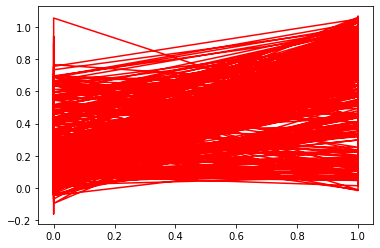

In [77]:
#Visualization of the training set results
#plt.xlabel('features')
#plt.ylabel('type')

plt.plot(y_train,model.predict(x_train), color = 'red')

plt.show()
#on voie avec. se resultat que la régression linaire n'est pas du tout adpet et les resultat sont tres faible en 
#dessus de 0,5 ce qui signifie que notre resulté n'est pas mieux que le hazard.
#de cefait soit je suprime d'autre variable pour essayer d'avoir des resultat un peut plus concluent soite je passe a la progression logistique  

In [78]:
# Modèle de régression logistique
#Construire un premier modèle de régression logistique avec plusieur variable variable explicative comme la classe l'age
#le sex homme ou femme et l'embarcastion diviser en 3 type de colonne distint chacune.

from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression(solver='lbfgs', multi_class='auto', random_state = 0)
reg_log.fit(x_train, y_train)

# Prédictions des probabilités
prob_pred = reg_log.predict_proba(x_train)

# Prédictions des résultats du Test train set
y_pred = reg_log.predict(x_train)

# Matrice de confusion
from sklearn.metrics import confusion_matrix
#affichage plus de la matrice de confusion
cm = pd.DataFrame(confusion_matrix(y_train, y_pred), columns=['prédit ' + str(_) for _ in reg_log.classes_])
cm.index = ['vrai ' + str(_) for _ in reg_log.classes_]
cm




/Users/ano/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ano/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,prédit 0,prédit 1
vrai 0,461,88
vrai 1,99,243


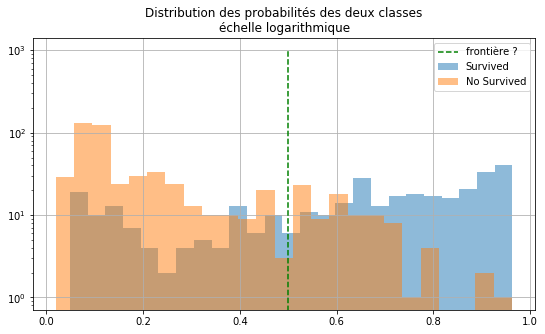

In [81]:
#proba_1 = reg_log2.predict_proba(X)[:, 1]
prob_pred = reg_log.predict_proba(x_train)[:, 1]
pr = pd.DataFrame(prob_pred, columns=['proba'])
pr['Pclass'] = y_train

fig, ax = plt.subplots(1,1,figsize=(9,5))

pr[pr.Pclass == 1]['proba'].hist(bins=25, label='Survived', alpha=0.5, ax=ax)
pr[pr.Pclass == 0]['proba'].hist(bins=25, label='No Survived', alpha=0.5, ax=ax)
ax.plot([0.5, 0.5], [0, 1000], 'g--', label="frontière ?")
ax.set_yscale('log') #l'échelle logarithmique permet de mieux voir les probabilités qui sont faibles
ax.set_title('Distribution des probabilités des deux classes\néchelle logarithmique')
ax.legend();









In [91]:
#Courbe ROC et AUC





print(reg_log.intercept_)
print(reg_log.coef_)

#calcul du R²
print("R² :", reg_log.score(x_train,y_train))

RMSE=np.sqrt(((y_train-reg_log.predict_proba(x_train))**2).sum()/len(y_train))
print("RMSE :", RMSE)







[3.49612222]
[[-1.13682202e+00 -3.27538379e-02  8.11883920e-06  1.26735957e+00
  -1.26491069e+00  1.74829692e-01  1.46321566e-01 -3.18702384e-01]]
R² : 0.7901234567901234
RMSE : 0.8418903676910376


In [83]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       549
           1       0.73      0.71      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891

0.7901234567901234


In [121]:
#print(titanic_train)
#dummies1 = pd.get_dummies(titanic_train['Sex'], prefix='sex')
#titanic_train = pd.concat([titanic_train,dummies1], axis=1)
#dummies_emb1 = pd.get_dummies(titanic_train['Embarked'], prefix='embarked')
#titanic_train = pd.concat([titanic_train,dummies_emb1], axis=1)
#del titanic_train['Sex']
#del titanic_train['Embarked']
#print(titanic_train)
#exporter le fichier training en CVS dans mon dossier pour analuse avec visuelle sur power BI
#titanic_train.to_csv('/Users/ano/Desktop/projet_2/titanic/titanic_x_y_train_.csv', sep = ',',index = True)

     PassengerId  Survived  Pclass   Age  SibSp  Parch            Ticket  \
0              1         0       3  22.0      1      0         A/5 21171   
1              2         1       1  38.0      1      0          PC 17599   
2              3         1       3  26.0      0      0  STON/O2. 3101282   
3              4         1       1  35.0      1      0            113803   
4              5         0       3  35.0      0      0            373450   
..           ...       ...     ...   ...    ...    ...               ...   
886          887         0       2  27.0      0      0            211536   
887          888         1       1  19.0      0      0            112053   
888          889         0       3  28.0      1      2        W./C. 6607   
889          890         1       1  26.0      0      0            111369   
890          891         0       3  32.0      0      0            370376   

        Fare  sex_female  sex_male  embarked_C  embarked_Q  embarked_S  
0     7.2500  